In [232]:
import pandas as pd
from E_Salary_Cities import read,rename_columns,merge,clean_positions,clean_cities
from E_Position_YearsOfExperience import clean_position,clean_senior_col,clean_years
from I_CompanySize_Technology import clean_company_size
import re
import matplotlib.pyplot as plt

In [233]:
POSITION = 'Position'
YEARS = 'Years of experience'
SENIORITY = 'Seniority level'
CITY = 'City'
SALARY = 'Salary'
COMPANY_SIZE = 'Company size'

In [234]:
df20, df19, df18 = read()
rename_columns(df20,df19,df18)
common_cols = set(df20.columns).intersection(df19.columns).intersection(df18)
print(common_cols)
df = merge([df20,df19,df18],common_cols)
df.info()

{'Gender', 'Seniority level', 'Salary', 'Main language at work', 'Age', 'Years of experience', 'Company size', 'Company type', 'Position', 'City'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2985 non-null   object 
 1   Seniority level        2960 non-null   object 
 2   Salary                 2993 non-null   float64
 3   Main language at work  2973 non-null   object 
 4   Age                    2780 non-null   float64
 5   Years of experience    2960 non-null   object 
 6   Company size           2962 non-null   object 
 7   Company type           2918 non-null   object 
 8   Position               2974 non-null   object 
 9   City                   2980 non-null   object 
dtypes: float64(2), object(8)
memory usage: 235.2+ KB


d:\Study\4B\Data science\github\Data-Science-Project\Questions\E_Salary_Cities.py:41: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat(data_frames, ignore_index=True)[common_columns]


Seniority level

In [235]:
df = clean_senior_col(df)
print(df[SENIORITY].unique())


d:\Study\4B\Data science\github\Data-Science-Project\Questions\E_Position_YearsOfExperience.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seniority level'] =df['Seniority level'].str.lower()


['senior' 'head' 'junior' 'middle']


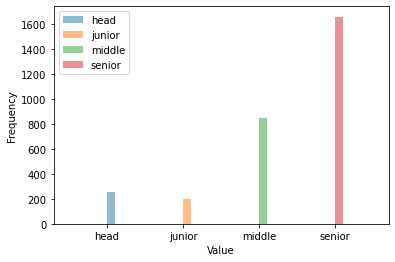

In [236]:
# group data by unique values in column 'seniority'
grouped_data = df.groupby(SENIORITY)

# plot histogram for each group
for group_name, group_data in grouped_data:
    plt.hist(group_data[SENIORITY], alpha=0.5, label=group_name)

# add plot labels and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# show plot
plt.show()

In [237]:
print(df[SENIORITY].value_counts())

senior    1659
middle     844
head       255
junior     198
Name: Seniority level, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'senior'),
  Text(1, 0, 'head'),
  Text(2, 0, 'junior'),
  Text(3, 0, 'middle')])

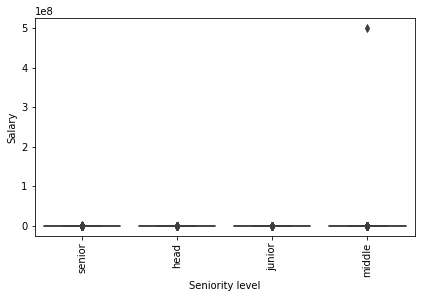

In [238]:
import seaborn as sns
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x=SENIORITY, y=SALARY, data=df)
plt.xticks(rotation=90)


In [239]:
from E_Salary_Cities import remove_outliers
df = remove_outliers(df,SALARY)

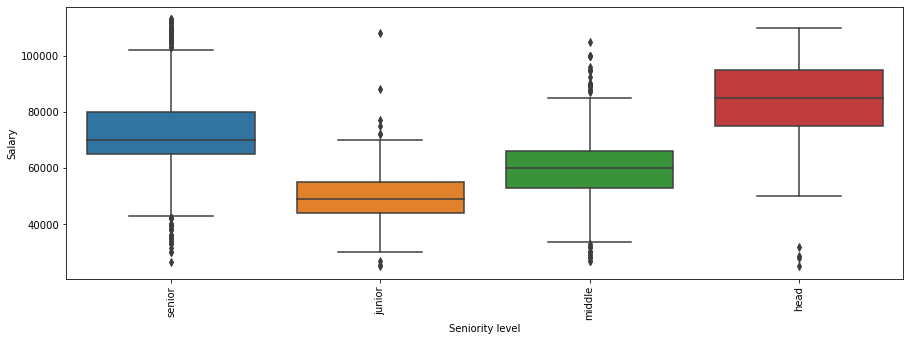

In [240]:

plt.figure(figsize=(15, 5))
sns.boxplot(x=SENIORITY, y=SALARY, data=df)
plt.xticks(rotation=90)
plt.show()

In [244]:
def clean_year(df):
    df['Years of experience'] = df['Years of experience'].astype(str).str.lower()
    df['Years of experience']=df['Years of experience']
    print("Missing Years of experience = ",df[YEARS].isna().sum())
    print("unique values are after str :",df[YEARS].unique())
    df['Years of experience']=df['Years of experience']\
    .replace('1,5','1.5')\
    .replace('1 (as qa engineer) / 11 in total','11')\
    .replace('2,5','2.5')\
    .replace('15, thereof 8 as cto','15')\
    .replace('6 (not as a data scientist, but as a lab scientist)','6')\
    .replace('less than year','0.5')\
    .replace('383','5')
    df['Years of experience'] = df['Years of experience'].astype(float)
    return df

print("Missing Years of experience = ",df[YEARS].isna().sum())
print("The available unique values are :",df[YEARS].unique())
df = clean_year(df)
print("# of  unique values after cleaning is :",df[YEARS].nunique())
print("unique values after cleaning are  :",df[YEARS].unique())

Missing Years of experience =  30
The available unique values are : [ 5.   7.   4.  17.   6.   8.  15.   2.  25.   nan 14.  11.  18.  13.
 30.  10.  12.   3.  40.  26.   9.  19.  20.   5.5 22.  16.   0.8  1.
  1.5  6.5 21.   7.5 28.  29.  23.   4.5 27.   2.5  0.  31.   3.5  0.5]
Missing Years of experience =  0
unique values are after str : ['5.0' '7.0' '4.0' '17.0' '6.0' '8.0' '15.0' '2.0' '25.0' 'nan' '14.0'
 '11.0' '18.0' '13.0' '30.0' '10.0' '12.0' '3.0' '40.0' '26.0' '9.0'
 '19.0' '20.0' '5.5' '22.0' '16.0' '0.8' '1.0' '1.5' '6.5' '21.0' '7.5'
 '28.0' '29.0' '23.0' '4.5' '27.0' '2.5' '0.0' '31.0' '3.5' '0.5']
# of  unique values after cleaning is : 41
unique values after cleaning are  : [ 5.   7.   4.  17.   6.   8.  15.   2.  25.   nan 14.  11.  18.  13.
 30.  10.  12.   3.  40.  26.   9.  19.  20.   5.5 22.  16.   0.8  1.
  1.5  6.5 21.   7.5 28.  29.  23.   4.5 27.   2.5  0.  31.   3.5  0.5]


C:\Users\marye\AppData\Local\Temp\ipykernel_30992\1795278248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years of experience'] = df['Years of experience'].astype(str).str.lower()
C:\Users\marye\AppData\Local\Temp\ipykernel_30992\1795278248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years of experience']=df['Years of experience']
C:\Users\marye\AppData\Local\Temp\ipykernel_30992\1795278248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [104]:
df = df.dropna(how='any')
df = clean_positions(df)
print("# of  unique values after cleaning is :",df[POSITION].nunique())
print("unique values after cleaning are :",df[POSITION].unique())

# of  unique values after cleaning is : 15
unique values after cleaning are : ['Software Engineer' 'Backend Developer' 'Frontend Developer' 'DevOps'
 'Data Engineer' 'Designer (UI/UX)' 'Product Manager' 'Mobile Developer'
 'Researcher' 'QA Engineer' 'ML Engineer' 'Data Scientist' 'Other'
 'Fullstack Developer' 'Security Engineer']


In [105]:
print("unique values before cleaning are :",df[CITY].nunique())
df = clean_cities(df,10)
print("# of  unique values after cleaning is :",df[CITY].nunique())
print("unique values after cleaning are :",df[CITY].unique())

unique values before cleaning are : 104
# of  unique values after cleaning is : 88
unique values after cleaning are : ['Munich' 'Berlin' 'Hamburg' 'Wolfsburg' 'Stuttgart' 'Schleswig-holstein'
 'Konstanz' 'Frankfurt' 'Cologne' 'Kempten' 'Munster' 'Erlangen' 'Vienna'
 'Moldova' 'Rosenheim' 'Mannheim' 'Boeblingen' 'Dusseldorf' 'Ingolstadt'
 'Nuremberg' 'Ansbach' 'Leipzig' 'Tuttlingen' 'Bonn' 'Koblenz' 'Warsaw'
 'Heidelberg' 'Helsinki' 'Wurzburg' 'Kyiv' 'Den haag' 'London' 'Amsterdam'
 'Tallinn' 'Utrecht' 'Stockholm' 'Moscow' 'Braunschweig' 'Dresden'
 'Lubeck' 'Bodensee' 'Milan' 'Rome' 'Wroclaw' 'Karlsruhe' 'Paris' 'Dublin'
 'Paderborn' 'Ulm' 'Prague' 'Hannover' 'Siegen' 'Minsk' 'Marseille'
 'Friedrichshafen' 'Walldorf' 'Eindhoven' 'France' 'Regensburg' 'Poland'
 'Heilbronn' 'Dortmund' 'Jena' 'City in russia' 'Cracow' 'Brunswick'
 'Zurich' 'Madrid' 'Barcelona' 'Sofia' 'Luttich' 'Milano' 'Bielefeld' 'Nj'
 'Usa' 'Hildesheim' 'Murnau am staffelsee' 'Innsbruck' 'Brussels'
 'Prefer not to say' 

In [82]:
df = clean_company_size(df,COMPANY_SIZE,filter=False)
print('Company size unique values are',df[COMPANY_SIZE].unique())

Company size unique values are ['50-100' '100-1000' 'Nov-50' '1000+' nan 'up to 10' '10-50' 'Oct-50']
